# Import Statements and Method/Function Definitions

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler

In [2]:
def tricubic(x):
  return np.where(np.abs(x)>1,0,70/81*(1-np.abs(x)**3)**3)

In [3]:
def Epanechnikov(x):
  return np.where(np.abs(x)>1,0,3/4*(1-np.abs(x)**2)) 

In [4]:
def Quartic(x):
  return np.where(np.abs(x)>1,0,15/16*(1-np.abs(x)**2)**2) 

In [5]:
def lowess_reg(x, y, xnew, kern, tau):
    n = len(x)
    yest = np.zeros(n)
    
    w = np.array([kern((x - x[i])/(2*tau)) for i in range(n)])     
    
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta, res, rnk, s = linalg.lstsq(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 
    f = interp1d(x, yest, fill_value='extrapolate')
    return f(xnew)

In [6]:
def lowess_kern(x, y, kern, tau):

    n = len(x)
    yest = np.zeros(n)
   
    w = np.array([kern((x - x[i])/(2*tau)) for i in range(n)])     
    
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta, res, rnk, s = linalg.lstsq(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

In [7]:
rf = RandomForestRegressor(n_estimators=100,max_depth=3,random_state=123)

In [8]:
rf2 = RandomForestRegressor(n_estimators=1000,max_depth=3,random_state=123)

In [9]:
rf3 = RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=123)

In [10]:
rf4 = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=123)

In [11]:
scale = StandardScaler()

# Boston Housing Prices Data

In [15]:
boston_data = pd.read_csv("Boston Housing Prices.csv")

In [16]:
x = boston_data["rooms"].values
y = boston_data["cmedv"].values

In [17]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_lwr = []
mse_rf = []

## Testing Kernels, tau = 0.01
### Best kernel was Epanechnikov with an MSE of 43.81

In [18]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_b1 = []
mse_epa_b1 = []
mse_quart_b1 = []

In [19]:
for idxtrain, idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = scale.fit_transform(xtrain.reshape(-1,1))
  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = scale.transform(xtest.reshape(-1,1))
  yhat_tri = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), tricubic, 0.01)
  yhat_epa = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), Epanechnikov, 0.01)
  yhat_quart = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), Quartic, 0.01)
  mse_tri_b1.append(mse(ytest,yhat_tri))
  mse_epa_b1.append(mse(ytest,yhat_epa))
  mse_quart_b1.append(mse(ytest,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_b1)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_b1)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_b1)))

The MSE for LOWESS with the tricubic kernel is: 45.43107355393225
The MSE for LOWESS with the Epanechnikov kernel is: 43.809283109365026
The MSE for LOWESS with the quartic kernel is: 45.3144949211256


Best result was the Epanechnikov kernel.

## Testing Kernels, tau = 0.05
### Best kernel was Epanechnikov with an MSE of 36.45

In [20]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_b2 = []
mse_epa_b2 = []
mse_quart_b2 = []

In [21]:
for idxtrain, idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = scale.fit_transform(xtrain.reshape(-1,1))
  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = scale.transform(xtest.reshape(-1,1))
  yhat_tri = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), tricubic, 0.05)
  yhat_epa = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), Epanechnikov, 0.05)
  yhat_quart = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), Quartic, 0.05)
  mse_tri_b2.append(mse(ytest,yhat_tri))
  mse_epa_b2.append(mse(ytest,yhat_epa))
  mse_quart_b2.append(mse(ytest,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_b2)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_b2)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_b2)))

The MSE for LOWESS with the tricubic kernel is: 37.12483107475168
The MSE for LOWESS with the Epanechnikov kernel is: 36.44728316493236
The MSE for LOWESS with the quartic kernel is: 37.09404229251549


Best result was the Epanechnikov kernel.

## Testing Kernels, tau = 0.1
### Best kernel was tricubic kernel with an MSE of 35.44

In [24]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_b3 = []
mse_epa_b3 = []
mse_quart_b3 = []

In [25]:
for idxtrain, idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = scale.fit_transform(xtrain.reshape(-1,1))
  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = scale.transform(xtest.reshape(-1,1))
  yhat_tri = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), tricubic, 0.1)
  yhat_epa = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), Epanechnikov, 0.1)
  yhat_quart = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), Quartic, 0.1)
  mse_tri_b3.append(mse(ytest,yhat_tri))
  mse_epa_b3.append(mse(ytest,yhat_epa))
  mse_quart_b3.append(mse(ytest,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_b3)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_b3)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_b3)))

The MSE for LOWESS with the tricubic kernel is: 35.44061356471881
The MSE for LOWESS with the Epanechnikov kernel is: 35.53605299888907
The MSE for LOWESS with the quartic kernel is: 35.47758360351477


Best result was tricubic.

## Testing Kernels, tau = 0.5
### Best kernel was quartic with an MSE of 36.92

In [28]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_b4 = []
mse_epa_b4 = []
mse_quart_b4 = []

In [29]:
for idxtrain, idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = scale.fit_transform(xtrain.reshape(-1,1))
  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = scale.transform(xtest.reshape(-1,1))
  yhat_tri = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), tricubic, 0.5)
  yhat_epa = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), Epanechnikov, 0.5)
  yhat_quart = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), Quartic, 0.5)
  mse_tri_b4.append(mse(ytest,yhat_tri))
  mse_epa_b4.append(mse(ytest,yhat_epa))
  mse_quart_b4.append(mse(ytest,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_b4)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_b4)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_b4)))

The MSE for LOWESS with the tricubic kernel is: 36.9777520238979
The MSE for LOWESS with the Epanechnikov kernel is: 37.12131906673285
The MSE for LOWESS with the quartic kernel is: 36.924548944943005


Best result was quartic.

## Testing Random Forests

In [30]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_100_3 = []
mse_100_5 = []
mse_1000_3 = []
mse_1000_5 = []

In [31]:
for idxtrain,idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = scale.fit_transform(xtrain.reshape(-1,1))
  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = scale.transform(xtest.reshape(-1,1))
  rf.fit(xtrain,ytrain)
  rf2.fit(xtrain,ytrain)
  rf3.fit(xtrain,ytrain)
  rf4.fit(xtrain,ytrain)
  yhat_rf_1003 = rf.predict(xtest)
  yhat_rf_10003 = rf2.predict(xtest)
  yhat_rf_10005 = rf3.predict(xtest)
  yhat_rf_1005 = rf4.predict(xtest)
  mse_100_3.append(mse(ytest,yhat_rf_1003))
  mse_1000_3.append(mse(ytest,yhat_rf_10003))
  mse_1000_5.append(mse(ytest,yhat_rf_10005))
  mse_100_5.append(mse(ytest,yhat_rf_1005))
print("The MSE for Random Forest with 100 trees and depth of 3: " + str(np.mean(mse_100_3)))
print("The MSE for Random Forest with 1000 trees and depth of 3: " + str(np.mean(mse_1000_3)))
print("The MSE for Random Forest with 100 trees and depth of 5: " + str(np.mean(mse_100_5)))
print("The MSE for Random Forest with 1000 trees and depth of 5: " + str(np.mean(mse_1000_5)))

The MSE for Random Forest with 100 trees and depth of 3: 35.99815586185197
The MSE for Random Forest with 1000 trees and depth of 3: 35.87895228710361
The MSE for Random Forest with 100 trees and depth of 5: 38.33351554015932
The MSE for Random Forest with 1000 trees and depth of 5: 38.000773576478416


Best result was a forest of 1000 trees with a depth of 3.

## Testing Kernel vs. Random Forest
### Locally Weighted Regression won with an MSE  of 35.44

In [32]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_lwr = []
mse_rf = []

In [33]:
for idxtrain,idxtest in kf.split(x):
  ytrain = y[idxtrain]
  xtrain = x[idxtrain]
  xtrain = scale.fit_transform(xtrain.reshape(-1,1))
  ytest = y[idxtest]
  xtest = x[idxtest]
  xtest = scale.transform(xtest.reshape(-1,1))
  yhat_lwr = lowess_reg(xtrain.ravel(), ytrain, xtest.ravel(), tricubic, 0.1)
  rf2.fit(xtrain,ytrain)
  yhat_rf = rf2.predict(xtest)
  mse_lwr.append(mse(ytest,yhat_lwr))
  mse_rf.append(mse(ytest,yhat_rf))
print("The MSE for Random Forest is: " + str(np.mean(mse_rf)))
print("The MSE for Locally Weighted Regression is: " + str(np.mean(mse_lwr)))

The MSE for Random Forest is: 35.87895228710361
The MSE for Locally Weighted Regression is: 35.44061356471881


Best result is LOWESS

## Plot

In [70]:
xtrain, xtest, ytrain, ytest = tts(x.reshape(-1,1),y,test_size=0.25,random_state=123)

In [71]:
rf2.fit(xtrain,ytrain)
yhat = rf2.predict(xtest)

In [72]:
M = np.column_stack([xtest,yhat])
M = M[np.argsort(M[:,0])]

In [73]:
ytrain = ytrain.reshape(len(ytrain),)
ytest = ytest.reshape(len(ytest),)

In [74]:
dat = np.concatenate([xtrain,ytrain.reshape(-1,1)], axis=1)

dat = dat[np.argsort(dat[:, 0])]

dat_test = np.concatenate([xtest,ytest.reshape(-1,1)], axis=1)
dat_test = dat_test[np.argsort(dat_test[:, 0])]

In [75]:
yhat_lowess = lowess_kern(dat[:,0],dat[:,1],tricubic,0.1)

In [76]:
datb = np.concatenate([dat[:,0].reshape(-1,1),yhat_lowess.reshape(-1,1)], axis=1)

In [77]:
f = interp1d(datb[:,0], datb[:,1],fill_value='extrapolate')

yhat2 = f(dat_test[:,0])

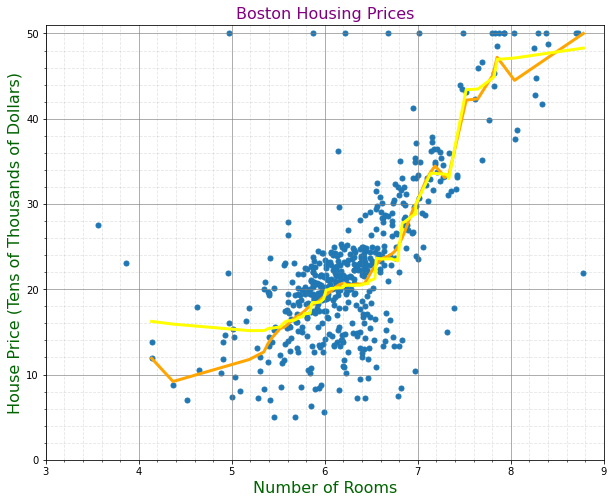

In [78]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(3, 9)
ax.set_ylim(0, 51)
ax.scatter(x = boston_data['rooms'], y = boston_data['cmedv'],s=25)
ax.plot(dat_test[:,0], yhat2, color='orange',lw=3)
ax.plot(M[:,0], M[:,1], color='yellow',lw=3)
ax.set_xlabel('Number of Rooms',fontsize=16,color='Darkgreen')
ax.set_ylabel('House Price (Tens of Thousands of Dollars)',fontsize=16,color='Darkgreen')
ax.set_title('Boston Housing Prices',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

In [ ]:
# See if the xtest, ytest part is better
plt.scatter(xtest,ytest,color='blue',alpha=0.5)
plt.plot(M[:,0],M[:,1],color='red',lw=2)

# Cars Data

In [44]:
cars_data = pd.read_csv("cars.csv")

In [45]:
x_2 = cars_data['WGT'].values
y_2 = cars_data['MPG'].values

## Testing Kernels, tau = 0.01
### Best kernel was Epanechnikov with an MSE of 24.32

In [46]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_c1 = []
mse_epa_c1 = []
mse_quart_c1 = []

In [47]:
for idxtrain, idxtest in kf.split(x_2):
  y2train = y_2[idxtrain]
  x2train = x_2[idxtrain]
  x2train = scale.fit_transform(x2train.reshape(-1,1))
  y2test = y_2[idxtest]
  x2test = x_2[idxtest]
  x2test = scale.transform(x2test.reshape(-1,1))
  yhat_tri = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), tricubic, 0.01)
  yhat_epa = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Epanechnikov, 0.01)
  yhat_quart = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Quartic, 0.01)
  mse_tri_c1.append(mse(y2test,yhat_tri))
  mse_epa_c1.append(mse(y2test,yhat_epa))
  mse_quart_c1.append(mse(y2test,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_c1)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_c1)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_c1)))

The MSE for LOWESS with the tricubic kernel is: 24.577887196960564
The MSE for LOWESS with the Epanechnikov kernel is: 24.31770096710489
The MSE for LOWESS with the quartic kernel is: 24.492738385672084


Best result was Epanechnikov.

## Testing Kernels, tau = 0.05
### Best kernel was Epanechnikov with an MSE of 18.48

In [48]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_c2 = []
mse_epa_c2 = []
mse_quart_c2 = []

In [49]:
for idxtrain, idxtest in kf.split(x_2):
  y2train = y_2[idxtrain]
  x2train = x_2[idxtrain]
  x2train = scale.fit_transform(x2train.reshape(-1,1))
  y2test = y_2[idxtest]
  x2test = x_2[idxtest]
  x2test = scale.transform(x2test.reshape(-1,1))
  yhat_tri = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), tricubic, 0.05)
  yhat_epa = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Epanechnikov, 0.05)
  yhat_quart = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Quartic, 0.05)
  mse_tri_c2.append(mse(y2test,yhat_tri))
  mse_epa_c2.append(mse(y2test,yhat_epa))
  mse_quart_c2.append(mse(y2test,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_c2)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_c2)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_c2)))

The MSE for LOWESS with the tricubic kernel is: 18.813999140430287
The MSE for LOWESS with the Epanechnikov kernel is: 18.48053295517476
The MSE for LOWESS with the quartic kernel is: 18.81908789744631


Best result was Epanechnikov.

## Testing Kernels, tau = 0.1
### Best kernel was Epanechnikov with an MSE of 17.81

In [50]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_c3 = []
mse_epa_c3 = []
mse_quart_c3 = []

In [51]:
for idxtrain, idxtest in kf.split(x_2):
  y2train = y_2[idxtrain]
  x2train = x_2[idxtrain]
  x2train = scale.fit_transform(x2train.reshape(-1,1))
  y2test = y_2[idxtest]
  x2test = x_2[idxtest]
  x2test = scale.transform(x2test.reshape(-1,1))
  yhat_tri = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), tricubic, 0.1)
  yhat_epa = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Epanechnikov, 0.1)
  yhat_quart = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Quartic, 0.1)
  mse_tri_c3.append(mse(y2test,yhat_tri))
  mse_epa_c3.append(mse(y2test,yhat_epa))
  mse_quart_c3.append(mse(y2test,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_c3)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_c3)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_c3)))

The MSE for LOWESS with the tricubic kernel is: 17.864397104281963
The MSE for LOWESS with the Epanechnikov kernel is: 17.81189365251738
The MSE for LOWESS with the quartic kernel is: 17.893133453217505


Best result was Epanechnikov.

## Testing Kernels, tau = 0.5
### Best kernel was quartic with an MSE of 17.77

In [52]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_c4 = []
mse_epa_c4 = []
mse_quart_c4 = []

In [53]:
for idxtrain, idxtest in kf.split(x_2):
  y2train = y_2[idxtrain]
  x2train = x_2[idxtrain]
  x2train = scale.fit_transform(x2train.reshape(-1,1))
  y2test = y_2[idxtest]
  x2test = x_2[idxtest]
  x2test = scale.transform(x2test.reshape(-1,1))
  yhat_tri = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), tricubic, 0.5)
  yhat_epa = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Epanechnikov, 0.5)
  yhat_quart = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Quartic, 0.5)
  mse_tri_c4.append(mse(y2test,yhat_tri))
  mse_epa_c4.append(mse(y2test,yhat_epa))
  mse_quart_c4.append(mse(y2test,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_c4)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_c4)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_c4)))

The MSE for LOWESS with the tricubic kernel is: 17.783657951947834
The MSE for LOWESS with the Epanechnikov kernel is: 17.776868780634338
The MSE for LOWESS with the quartic kernel is: 17.765601561138332


Best result was quartic.

## Testing Random Forests

In [54]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_100_3 = []
mse_100_5 = []
mse_1000_3 = []
mse_1000_5 = []

In [55]:
for idxtrain,idxtest in kf.split(x_2):
  y2train = y_2[idxtrain]
  x2train = x_2[idxtrain]
  x2train = scale.fit_transform(x2train.reshape(-1,1))
  y2test = y_2[idxtest]
  x2test = x_2[idxtest]
  x2test = scale.transform(x2test.reshape(-1,1))
  rf.fit(x2train,y2train)
  rf2.fit(x2train,y2train)
  rf3.fit(x2train,y2train)
  rf4.fit(x2train,y2train)
  yhat_rf_1003 = rf.predict(x2test)
  yhat_rf_10003 = rf2.predict(x2test)
  yhat_rf_10005 = rf3.predict(x2test)
  yhat_rf_1005 = rf4.predict(x2test)
  mse_100_3.append(mse(y2test,yhat_rf_1003))
  mse_1000_3.append(mse(y2test,yhat_rf_10003))
  mse_1000_5.append(mse(y2test,yhat_rf_10005))
  mse_100_5.append(mse(y2test,yhat_rf_1005))
print("The MSE for Random Forest with 100 trees and depth of 3: " + str(np.mean(mse_100_3)))
print("The MSE for Random Forest with 1000 trees and depth of 3: " + str(np.mean(mse_1000_3)))
print("The MSE for Random Forest with 100 trees and depth of 5: " + str(np.mean(mse_100_5)))
print("The MSE for Random Forest with 1000 trees and depth of 5: " + str(np.mean(mse_1000_5)))

The MSE for Random Forest with 100 trees and depth of 3: 18.0448440598114
The MSE for Random Forest with 1000 trees and depth of 3: 17.980882233098686
The MSE for Random Forest with 100 trees and depth of 5: 19.036128319537333
The MSE for Random Forest with 1000 trees and depth of 5: 19.10140763697413


Best result was a forest of 1000 trees with a depth of 3.

## Testing Kernel vs. Random Forest
### Locally Weighted Regression won with an MSE of 26.60

In [ ]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_lwr = []
mse_rf = []

In [57]:
for idxtrain,idxtest in kf.split(x_2):
  y2train = y_2[idxtrain]
  x2train = x_2[idxtrain]
  x2train = scale.fit_transform(x2train.reshape(-1,1))
  y2test = y_2[idxtest]
  x2test = x_2[idxtest]
  x2test = scale.transform(x2test.reshape(-1,1))
  yhat_lwr = lowess_reg(x2train.ravel(), y2train, x2test.ravel(), Quartic, 0.5)
  rf2.fit(x2train,y2train)
  yhat_rf = rf2.predict(x2test)
  mse_lwr.append(mse(y2test,yhat_lwr))
  mse_rf.append(mse(y2test,yhat_rf))
print("The MSE for Random Forest is: " + str(np.mean(mse_rf)))
print("The MSE for Locally Weighted Regression is: " + str(np.mean(mse_lwr)))

The MSE for Random Forest is: 26.929917260101142
The MSE for Locally Weighted Regression is: 26.603107562928574


## Plot

In [79]:
xtrain, xtest, ytrain, ytest = tts(x_2.reshape(-1,1),y_2,test_size=0.25,random_state=123)

In [80]:
rf2.fit(xtrain,ytrain)
yhat = rf2.predict(xtest)

In [81]:
M = np.column_stack([xtest,yhat])
M = M[np.argsort(M[:,0])]

In [82]:
ytrain = ytrain.reshape(len(ytrain),)
ytest = ytest.reshape(len(ytest),)

In [83]:
dat = np.concatenate([xtrain,ytrain.reshape(-1,1)], axis=1)

dat = dat[np.argsort(dat[:, 0])]

dat_test = np.concatenate([xtest,ytest.reshape(-1,1)], axis=1)
dat_test = dat_test[np.argsort(dat_test[:, 0])]

In [84]:
yhat_lowess = lowess_kern(dat[:,0],dat[:,1],Quartic,0.5)

In [85]:
datc = np.concatenate([dat[:,0].reshape(-1,1),yhat_lowess.reshape(-1,1)], axis=1)

In [86]:
f = interp1d(datc[:,0], datc[:,1],fill_value='extrapolate')

yhat2 = f(dat_test[:,0])

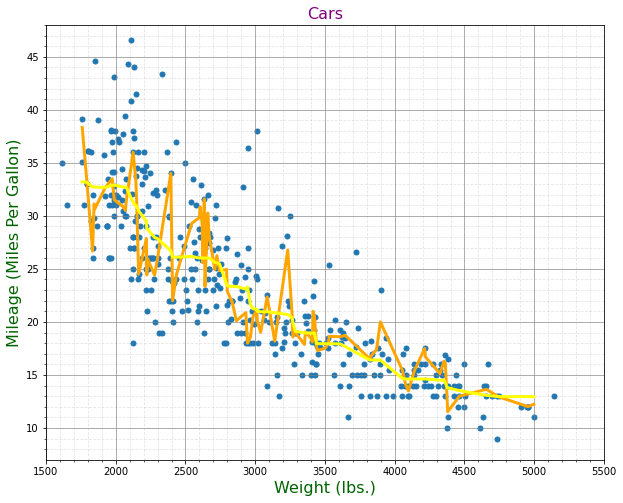

In [94]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(1500, 5500)
ax.set_ylim(7, 48)
ax.scatter(x = cars_data['WGT'], y = cars_data['MPG'],s=25)
ax.plot(dat_test[:,0], yhat2, color='orange',lw=3)
ax.plot(M[:,0], M[:,1], color='yellow',lw=3)
ax.set_xlabel('Weight (lbs.)',fontsize=16,color='Darkgreen')
ax.set_ylabel('Mileage (Miles Per Gallon)',fontsize=16,color='Darkgreen')
ax.set_title('Cars',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()

In [ ]:
# See if the xtest, ytest part is better
plt.scatter(xtest,ytest,color='blue',alpha=0.5)
plt.plot(M[:,0],M[:,1],color='red',lw=2)

# Walmart Sales Data

In [111]:
walmart_data = pd.read_csv("Walmart.csv")

In [112]:
x_3 = walmart_data["Weekly_Sales"].values
y_3 = walmart_data["Unemployment"].values

## Testing Kernels, tau = 0.01
### Best kernel was Epanechnikov with an MSE of 3.34

In [113]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_w1 = []
mse_epa_w1 = []
mse_quart_w1 = []

In [114]:
for idxtrain, idxtest in kf.split(x_3):
  y3train = y_3[idxtrain]
  x3train = x_3[idxtrain]
  x3train = scale.fit_transform(x3train.reshape(-1,1))
  y3test = y_3[idxtest]
  x3test = x_3[idxtest]
  x3test = scale.transform(x3test.reshape(-1,1))
  yhat_tri = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), tricubic, 0.01)
  yhat_epa = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Epanechnikov, 0.01)
  yhat_quart = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Quartic, 0.01)
  mse_tri_w1.append(mse(y3test,yhat_tri))
  mse_epa_w1.append(mse(y3test,yhat_epa))
  mse_quart_w1.append(mse(y3test,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_w1)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_w1)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_w1)))

The MSE for LOWESS with the tricubic kernel is: 3.3524118854786735
The MSE for LOWESS with the Epanechnikov kernel is: 3.341048269327338
The MSE for LOWESS with the quartic kernel is: 3.3529532126779413


Best result was Epanechnikov.

## Testing Kernels, tau = 0.05
### Best kernel was quartic with an MSE of 3.315

In [120]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_w2 = []
mse_epa_w2 = []
mse_quart_w2 = []

In [121]:
for idxtrain, idxtest in kf.split(x_3):
  y3train = y_3[idxtrain]
  x3train = x_3[idxtrain]
  x3train = scale.fit_transform(x3train.reshape(-1,1))
  y3test = y_3[idxtest]
  x3test = x_3[idxtest]
  x3test = scale.transform(x3test.reshape(-1,1))
  yhat_tri = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), tricubic, 0.05)
  yhat_epa = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Epanechnikov, 0.05)
  yhat_quart = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Quartic, 0.05)
  mse_tri_w2.append(mse(y3test,yhat_tri))
  mse_epa_w2.append(mse(y3test,yhat_epa))
  mse_quart_w2.append(mse(y3test,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_w2)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_w2)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_w2)))

The MSE for LOWESS with the tricubic kernel is: 3.316125853540845
The MSE for LOWESS with the Epanechnikov kernel is: 3.3212195767032773
The MSE for LOWESS with the quartic kernel is: 3.315280342725468


Best result was quartic.

## Testing Kernels, tau = 0.1
### Best kernel was quartic with an MSE of 3.345

In [122]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_w3 = []
mse_epa_w3 = []
mse_quart_w3 = []

In [123]:
for idxtrain, idxtest in kf.split(x_3):
  y3train = y_3[idxtrain]
  x3train = x_3[idxtrain]
  x3train = scale.fit_transform(x3train.reshape(-1,1))
  y3test = y_3[idxtest]
  x3test = x_3[idxtest]
  x3test = scale.transform(x3test.reshape(-1,1))
  yhat_tri = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), tricubic, 0.1)
  yhat_epa = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Epanechnikov, 0.1)
  yhat_quart = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Quartic, 0.1)
  mse_tri_w3.append(mse(y3test,yhat_tri))
  mse_epa_w3.append(mse(y3test,yhat_epa))
  mse_quart_w3.append(mse(y3test,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_w3)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_w3)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_w3)))

The MSE for LOWESS with the tricubic kernel is: 3.3493754937114226
The MSE for LOWESS with the Epanechnikov kernel is: 3.361755271956798
The MSE for LOWESS with the quartic kernel is: 3.3454153879366153


Best result was quartic.

## Testing Kernels, tau = 0.5
### Best kernel was quartic with an MSE of 3.44

In [124]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_tri_w4 = []
mse_epa_w4 = []
mse_quart_w4 = []

In [125]:
for idxtrain, idxtest in kf.split(x_3):
  y3train = y_3[idxtrain]
  x3train = x_3[idxtrain]
  x3train = scale.fit_transform(x3train.reshape(-1,1))
  y3test = y_3[idxtest]
  x3test = x_3[idxtest]
  x3test = scale.transform(x3test.reshape(-1,1))
  yhat_tri = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), tricubic, 0.5)
  yhat_epa = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Epanechnikov, 0.5)
  yhat_quart = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Quartic, 0.5)
  mse_tri_w4.append(mse(y3test,yhat_tri))
  mse_epa_w4.append(mse(y3test,yhat_epa))
  mse_quart_w4.append(mse(y3test,yhat_quart))
print("The MSE for LOWESS with the tricubic kernel is: " + str(np.mean(mse_tri_w4)))
print("The MSE for LOWESS with the Epanechnikov kernel is: " + str(np.mean(mse_epa_w4)))
print("The MSE for LOWESS with the quartic kernel is: " + str(np.mean(mse_quart_w4)))

The MSE for LOWESS with the tricubic kernel is: 3.446431960531153
The MSE for LOWESS with the Epanechnikov kernel is: 3.4533488244123918
The MSE for LOWESS with the quartic kernel is: 3.4419039724403033


Best result was quartic.

## Testing Random Forests

In [107]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_100_3 = []
mse_100_5 = []
mse_1000_3 = []
mse_1000_5 = []

In [108]:
for idxtrain,idxtest in kf.split(x_3):
  y3train = y_3[idxtrain]
  x3train = x_3[idxtrain]
  x3train = scale.fit_transform(x3train.reshape(-1,1))
  y3test = y_3[idxtest]
  x3test = x_3[idxtest]
  x3test = scale.transform(x3test.reshape(-1,1))
  rf.fit(x3train,y3train)
  rf2.fit(x3train,y3train)
  rf3.fit(x3train,y3train)
  rf4.fit(x3train,y3train)
  yhat_rf_1003 = rf.predict(x3test)
  yhat_rf_10003 = rf2.predict(x3test)
  yhat_rf_10005 = rf3.predict(x3test)
  yhat_rf_1005 = rf4.predict(x3test)
  mse_100_3.append(mse(y3test,yhat_rf_1003))
  mse_1000_3.append(mse(y3test,yhat_rf_10003))
  mse_1000_5.append(mse(y3test,yhat_rf_10005))
  mse_100_5.append(mse(y3test,yhat_rf_1005))
print("The MSE for Random Forest with 100 trees and depth of 3: " + str(np.mean(mse_100_3)))
print("The MSE for Random Forest with 1000 trees and depth of 3: " + str(np.mean(mse_1000_3)))
print("The MSE for Random Forest with 100 trees and depth of 5: " + str(np.mean(mse_100_5)))
print("The MSE for Random Forest with 1000 trees and depth of 5: " + str(np.mean(mse_1000_5)))

The MSE for Random Forest with 100 trees and depth of 3: 3.3374221213974926
The MSE for Random Forest with 1000 trees and depth of 3: 3.3391788076451734
The MSE for Random Forest with 100 trees and depth of 5: 3.3154203306077377
The MSE for Random Forest with 1000 trees and depth of 5: 3.3134753302710527


Best result was a forest of 1000 trees with a depth of 5.

## Testing Kernel vs. Random Forest
### Random Forest Regression won with an MSE of 3.31

In [127]:
kf = KFold(n_splits=10,shuffle=True,random_state=410)
mse_lwr = []
mse_rf = []

In [128]:
for idxtrain,idxtest in kf.split(x_3):
  y3train = y_3[idxtrain]
  x3train = x_3[idxtrain]
  x3train = scale.fit_transform(x3train.reshape(-1,1))
  y3test = y_3[idxtest]
  x3test = x_3[idxtest]
  x3test = scale.transform(x3test.reshape(-1,1))
  yhat_lwr = lowess_reg(x3train.ravel(), y3train, x3test.ravel(), Quartic, 0.05)
  rf3.fit(x3train,y3train)
  yhat_rf = rf3.predict(x3test)
  mse_lwr.append(mse(y3test,yhat_lwr))
  mse_rf.append(mse(y3test,yhat_rf))
print("The MSE for Random Forest is: " + str(np.mean(mse_rf)))
print("The MSE for Locally Weighted Regression is: " + str(np.mean(mse_lwr)))

The MSE for Random Forest is: 3.3134753302710527
The MSE for Locally Weighted Regression is: 3.315280342725468


Best result was Random Forest.

## Plot

In [165]:
xtrain, xtest, ytrain, ytest = tts(x_3.reshape(-1,1),y_3,test_size=0.25,random_state=123)

In [166]:
rf3.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=5, n_estimators=1000, random_state=123)

In [167]:
yhat = rf3.predict(xtest)

In [168]:
M = np.column_stack([xtest,yhat])
M = M[np.argsort(M[:,0])]

In [169]:
ytrain = ytrain.reshape(len(ytrain),)
ytest = ytest.reshape(len(ytest),)

In [170]:
dat = np.concatenate([xtrain,ytrain.reshape(-1,1)], axis=1)

dat = dat[np.argsort(dat[:, 0])]

dat_test = np.concatenate([xtest,ytest.reshape(-1,1)], axis=1)
dat_test = dat_test[np.argsort(dat_test[:, 0])]

In [171]:
yhat_lowess = lowess_kern(dat[:,0],dat[:,1],Quartic,0.05)

In [172]:
datw = np.concatenate([dat[:,0].reshape(-1,1),yhat_lowess.reshape(-1,1)], axis=1)

In [173]:
f = interp1d(datw[:,0], datw[:,1],fill_value='extrapolate')

yhat2 = f(dat_test[:,0])

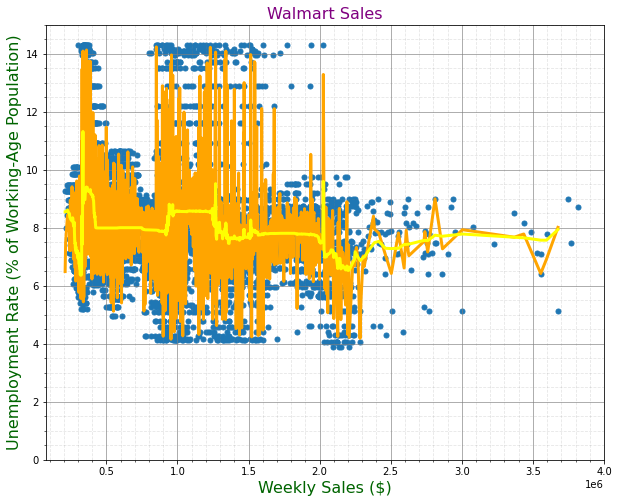

In [174]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlim(75000, 4000000)
ax.set_ylim(0, 15)
ax.scatter(x = walmart_data['Weekly_Sales'], y = walmart_data['Unemployment'],s=25)
ax.plot(dat_test[:,0], yhat2, color='orange',lw=3)
ax.plot(M[:,0], M[:,1], color='yellow',lw=3)
ax.set_xlabel('Weekly Sales ($)',fontsize=16,color='Darkgreen')
ax.set_ylabel('Unemployment Rate (% of Working-Age Population)',fontsize=16,color='Darkgreen')
ax.set_title('Walmart Sales',fontsize=16,color='purple')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()